In [1]:
import sys
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from getdist import plots, loadMCSamples

%matplotlib inline

In [2]:
# figure out configuration for laptop vs NERSC
laptop=True
if laptop:
    cosmo_dir = '/Users/afont/Desktop/bao-cosmology'
else:
    cosmo_dir = '/global/cfs/cdirs/desi/users/font/bao-cosmology'
sys.path.insert(1, f'{cosmo_dir}/py/')
import plotting

In [3]:
# read chains from here
cosmo_path = Path(cosmo_dir)
label='cmb_thetastar_ombh2_ombch2'

In [4]:
chains={}
for model in ['lcdm', 'olcdm', 'nulcdm', 'w0wa']:
    chain_path = cosmo_path / 'runs/cmb' / model / label
    chain = plotting.get_chain(chain_path, ignore_rows=0.2)
    chains[model] = chain

/Users/afont/Desktop/bao-cosmology/runs/cmb/nulcdm/cmb_thetastar_ombh2_ombch2/chain.1.txt
Removed 0.2 as burn in


(<getdist.plots.GetDistPlotter at 0x12e591be0>,
 <Axes: xlabel='$\\Omega_\\mathrm{bc} h^2$'>)

<Figure size 800x600 with 0 Axes>

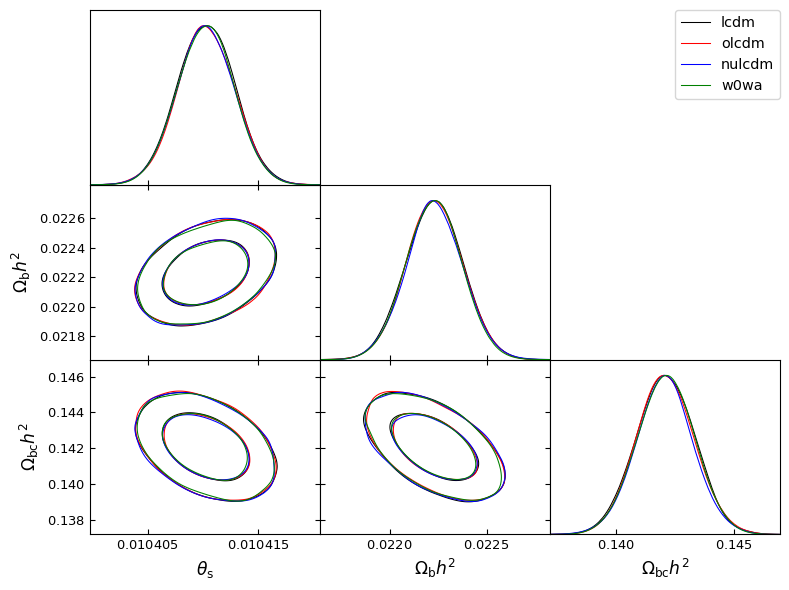

In [5]:
#plotting.plot_contours(chains, chain_labels=['mock_z0.001_bao', 'mock_z0.001_at', 'mock_z0.001_ap'],
#                       params=['hrdrag', 'omegam', 'ommh2rd2']) 
plotting.plot_contours(chains, chain_labels=chains.keys(), 
                       params=['thetastar','ombh2','ombch2'])

(<getdist.plots.GetDistPlotter at 0x12f42e5d0>,
 <Axes: xlabel='$H_0$', ylabel='$\\Omega_\\mathrm{m}$'>)

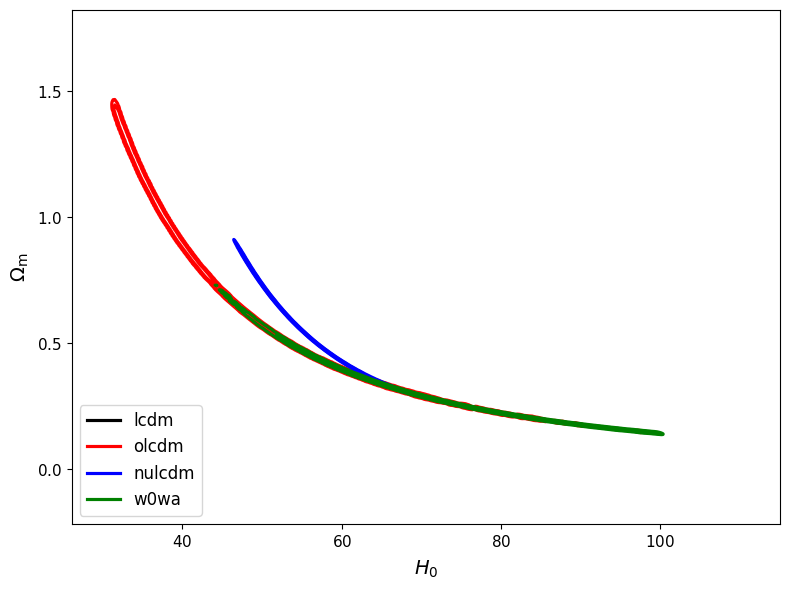

In [6]:
plotting.plot_contours(chains, chain_labels=chains.keys(), params=['H0','omegam'])

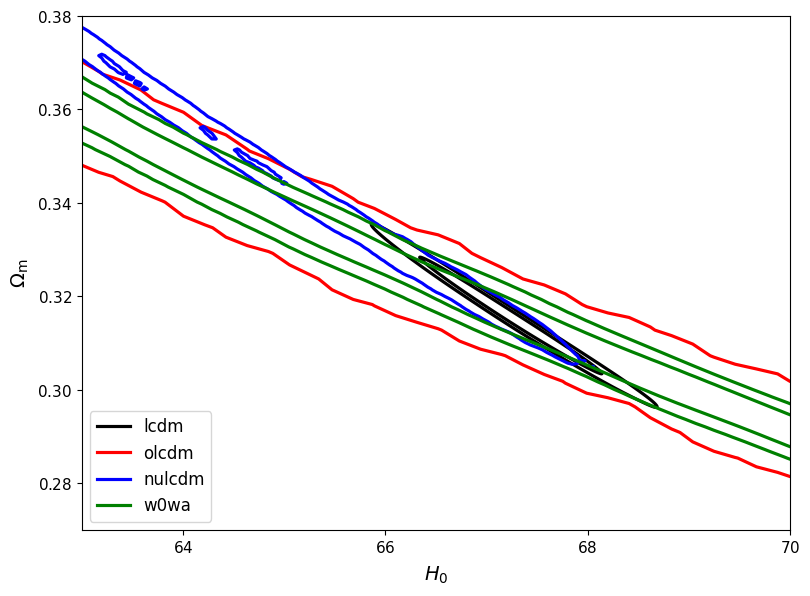

In [7]:
g, ax = plotting.plot_contours(chains, chain_labels=chains.keys(), params=['H0','omegam'])
ax.set_xlim([63,70])
ax.set_ylim([0.27,0.38])
ax.tick_params(axis='both', which='major', labelsize=g.settings.axes_fontsize)
#plt.savefig('singlez_bao_hrdrag_omegam.pdf', dpi=300, bbox_inches='tight')